## Observations and Insights 

In [40]:
%matplotlib notebook

In [249]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from sklearn.linear_model import LinearRegression

In [255]:
# At least three observations or inferences that can be made from the data.
# Include these observations at the top of notebook.
print("Here are three observations I saw in this dataset as I did my analysis:")
print("----------")
print("Observation 1: Mouse ID g989 was duplicated in this dataset, and thus removed from the analysis.") 
print("----------")
print("Observation 2: Ramicane had the smallest tumor volume mean at 40.216745mm3, with Capomulin following closely with 40.675741mmg. These seem to be the two most effective treatments at reducing tumor volume.") 
print("----------")
print("Observation 3: Besides Capomulin and Ramicane, all other treatments left the mean tumor volume above 50mm3. The Placebo treatment had a mean tumor volume of 54.033581mm3. Three treatments - Ketapril, Naftisol, and Stelasyn- actually left the mice with a mean tumor volumes ABOVE the Placebo treatment, which suggests that they may have worsened, or increased, the tumor volume rather than decreasing it as intended.")

Here are three observations I saw in this dataset as I did my analysis:
----------
Observation 1: Mouse ID g989 was duplicated in this dataset, and thus removed from the analysis.
----------
Observation 2: Ramicane had the smallest tumor volume mean at 40.216745mm3, with Capomulin following closely with 40.675741mmg. These seem to be the two most effective treatments at reducing tumor volume.
----------
Observation 3: Besides Capomulin and Ramicane, all other treatments left the mean tumor volume above 50mm3. The Placebo treatment had a mean tumor volume of 54.033581mm3. Three treatments - Ketapril, Naftisol, and Stelasyn- actually left the mice with a mean tumor volumes ABOVE the Placebo treatment, which suggests that they may have worsened, or increased, the tumor volume rather than decreasing it as intended.


In [190]:

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data 
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [191]:
# Read study results 
study_results_df = pd.read_csv(study_results_path)
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [192]:
# Combine the data into a single dataset - use outer merge to keep all info
merged_dataset_df = pd.merge(mouse_metadata_df,study_results_df,on='Mouse ID',how='outer')
# Display the data table for preview
merged_dataset_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [193]:
# Check columns 
merged_dataset_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [194]:
# Checking the number of mice.
unique_num_mice = merged_dataset_df["Mouse ID"].nunique()
unique_num_mice

249

In [195]:
# Count how many Mouse IDs are duplicated 
duplicated_mice_ID = merged_dataset_df.duplicated(subset=['Mouse ID','Timepoint']).sum()
duplicated_mice_ID

5

In [196]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
list_duplicated_mice = merged_dataset_df.loc[merged_dataset_df.duplicated(['Mouse ID','Timepoint'])]
list_duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [197]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_dataset_df.loc[merged_dataset_df['Mouse ID']=='g989']
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [198]:
# Drop duplicates
deduplicated_merged_dataset_df = merged_dataset_df.drop_duplicates()
deduplicated_merged_dataset_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [199]:
# Call the DataFrame, copy df
deduplicated_merged_dataset_df = deduplicated_merged_dataset_df.copy()   

In [200]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = deduplicated_merged_dataset_df.drop(deduplicated_merged_dataset_df.index[deduplicated_merged_dataset_df['Mouse ID'] == 'g989'], inplace = False)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [201]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
unique_num_mice = clean_df["Mouse ID"].nunique()
unique_num_mice

248

## Summary Statistics

In [202]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following 
# properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Call the DataFrame, copy df
clean_df = clean_df.copy()   

In [203]:
# Groupby Drum Regimen 
grouped_clean_df = clean_df.groupby('Drug Regimen')
grouped_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [204]:
# mean tumor volume of each drug regimen
tumor_volume_mean = grouped_clean_df.mean()['Tumor Volume (mm3)']
tumor_volume_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [205]:
# median tumor volume of each drug regimen
tumor_volume_median = grouped_clean_df.median()['Tumor Volume (mm3)']
tumor_volume_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [62]:
# mode 
mode_scipy = grouped_clean_df['Tumor Volume (mm3)'].sts.mode()
mode_scipy

AttributeError: 'SeriesGroupBy' object has no attribute 'mode'

In [206]:
# variance of tumor volume for each drug regimen 
tumor_volume_variance = grouped_clean_df.var()['Tumor Volume (mm3)']
tumor_volume_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [207]:
# standard deviation of tumor volume of each drug regimen
tumor_volume_sd = grouped_clean_df['Tumor Volume (mm3)'].std()
tumor_volume_sd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [208]:
# standard error of the mean (SEM) of the tumor volume of each drug regimen
tumor_volume_sems = grouped_clean_df['Tumor Volume (mm3)'].sem()
tumor_volume_sems

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [209]:
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({
     'Mean': tumor_volume_mean, 
     'Median': tumor_volume_median,
     'Variance':tumor_volume_variance,
     'SD': tumor_volume_sd,
     'SEM': tumor_volume_sems
    })

In [210]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen
summary_df.head(10)

,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [211]:
# Using the aggregation method, produce the same summary statistics 
# in a single line
aggregated_single_line = grouped_clean_df.agg(['mean', 'median','var','std', 'sem'])['Tumor Volume (mm3)']
aggregated_single_line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [212]:
# re-state df
grouped_clean_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
692,c580,Ketapril,Male,22,25,10,47.570174,1
693,c580,Ketapril,Male,22,25,15,51.991708,1
694,c580,Ketapril,Male,22,25,20,55.575322,2
695,c580,Ketapril,Male,22,25,25,56.289062,2


In [213]:
# count total number of timepoints for all mice tested for each drug 
# regime
total_timepoints = grouped_clean_df['Timepoint'].count() 
total_timepoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<IPython.core.display.Javascript object>


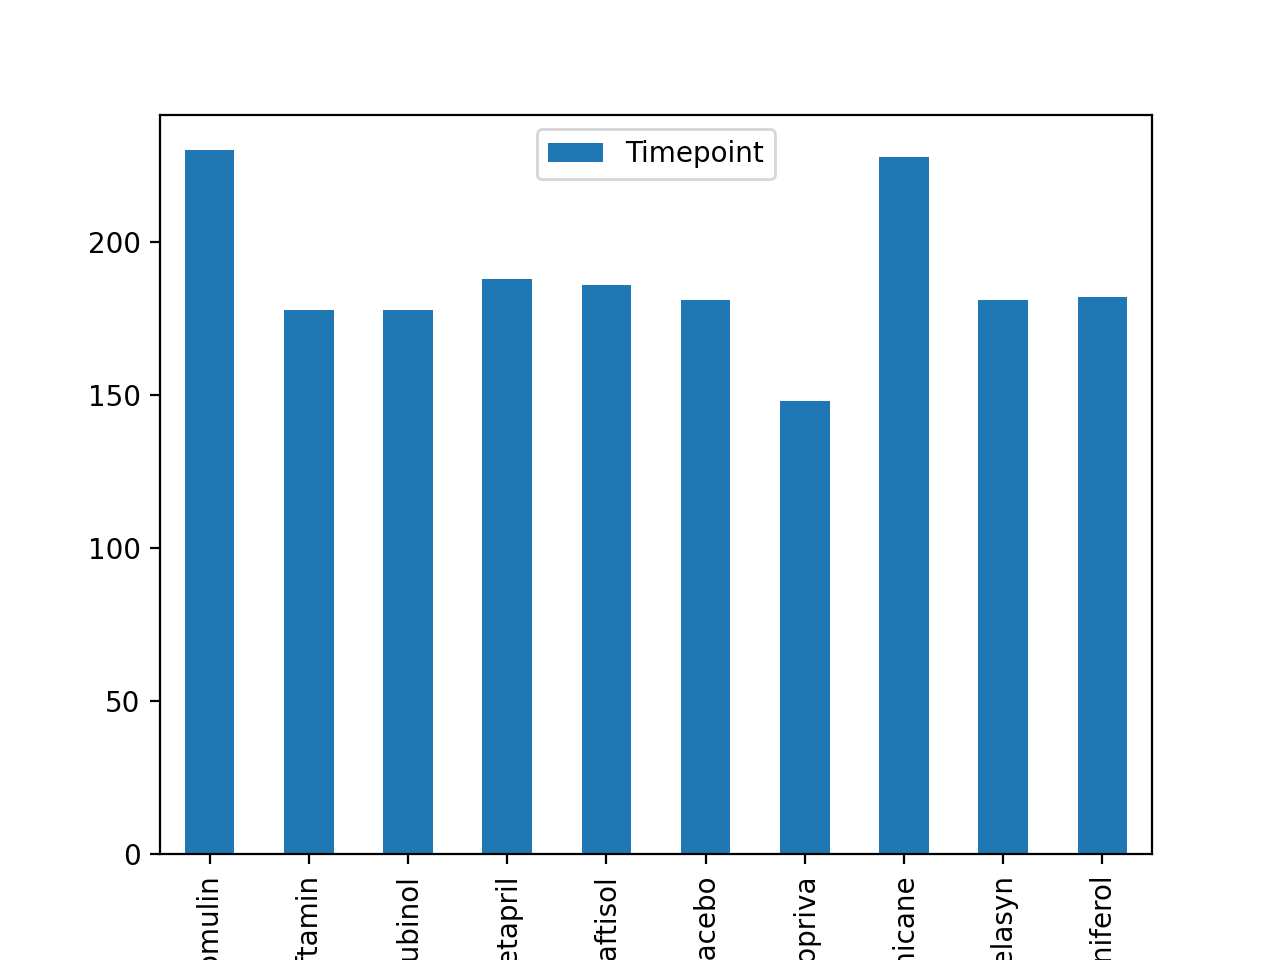

<AxesSubplot:xlabel='Drug Regimen'>

In [244]:
# Generate a bar plot showing the total number of timepoints for all 
# mice tested for each drug regimen using Pandas.
plotdata = pd.DataFrame(total_timepoints)
plotdata.plot(kind="bar")

In [222]:
# Generate a bar plot showing the total number of timepoints for all 
# mice tested for each drug regimen using pyplot.
grouped_clean_df.groupby('Drug Regimen')[total_timepoints].nunique().plot(kind='bar')
plt.show()

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [247]:
# Generate a pie plot showing the distribution of female versus male 
# mice using Pandas

clean_df['Sex'].value_counts().plot(kind='pie')
clean_df.show()

AttributeError: 'DataFrame' object has no attribute 'show'

In [243]:
# Generate a pie plot showing the distribution of female versus male 
# mice using pyplot

# Pie chart
labels_gender = clean_df['Sex']

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
       # shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-243-7b7a95269285>, line 12)

## Quartiles, Outliers and Boxplots

In [227]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [230]:
# Calculate the final tumor volume of each mouse across four of the 
# treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints_df = clean_df['Mouse ID','Timepoint'].max() 
max_timepoints_df

KeyError: ('Mouse ID', 'Timepoint')

In [231]:
# Merge this group df with the original dataframe to get the tumor volume 
# at the last timepoint
merge_df = pd.merge(grouped_clean_df, max_timepoints,on='Mouse ID',how='outer')
merge_df

TypeError: Can only merge Series or DataFrame objects, a <class 'pandas.core.groupby.generic.DataFrameGroupBy'> was passed

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any 
# potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the 
    # tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across 
# four regimens of interest


## Line and Scatter Plots

In [237]:
# Generate a line plot of tumor volume vs. time point for a mouse treated 
# with Capomulin
capomulin_df = clean_df[:,'Drug Regimen'=='Capomulin']
capomulin_df.head()

TypeError: '(slice(None, None, None), False)' is an invalid key

In [238]:
# Generate a scatter plot of average tumor volume vs. mouse weight for 
# the Capomulin regimen
scatter_df = pd.DataFrame.plot.scatter(x=capomulin_df['Tumor Volume (mm3)],
                             y=capomulin_df['Weight (g)'],)
scatter_df.head()

SyntaxError: EOL while scanning string literal (<ipython-input-238-d3f8c8ed382b>, line 3)

## Correlation and Regression

In [189]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
column_1 = grouped_clean_df["Weight (g)"]
column_2 = grouped_clean_df["Tumor Volume (mm3)"]
correlation = column_1.corr(column_2)

TypeError: unsupported type: <class 'pandas.core.groupby.generic.SeriesGroupBy'>

In [ ]:
# and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen
